Outline:

- introduce the `Audio` display object, show how to make sounds form a `numpy` array
- manipulate audio as arrays:
    - concatenation
    - reversing
    - downsampling
    - upsampling
- intro to the chromatic scale / note naming conventions

# Week 1: Playing Sound

<font size="6"> Laboratory ? </font> <br>
<font size="3"> Last updated July 25, 2022 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- Laws of sines/cosines
    
<font size="5"> Programming Skills </font>
- Type here
    
<font size="5"> Embedded Systems </font>
- Type here

## <span style="color:orange;"> 0. Required Hardware </span>
- Type here

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** me 

**Email:** me @purdue.edu

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# What is a sound?

Your ears are pretty remarkable. They are very sensitive air pressure sensors. When your ears detect patterns in the change of air pressure, you hear that as a sound.

Let's hear an example. If you have headphones, put them on now. Then, run the following cell and press play.

In [1]:
import numpy as np
from IPython.display import Audio

t = np.linspace(0, 5, 5 * 44100)
y = np.sin(440 * 2 * np.pi * t)

Audio(y, rate=44100)

What did you just hear? Let's visualize it using a graph.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 5)

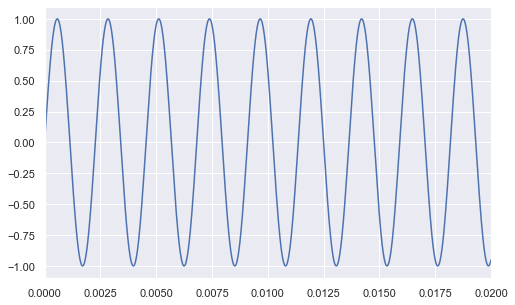

In [3]:
fig, ax = plt.subplots()
ax.plot(t, y)
ax.set_xlim(0, 0.02)
plt.show()

We can see that it is a sine wave with a frequency of 440 Hz. In music, the sound it makes is called `A`, or more specifically, `A4` or "middle A". When your ears detect air pressure changing in this pattern, you hear it as a middle A.

Let's inspect the code we just used a bit more carefully. We gave the function `Audio` two parameters, `y` and `rate`. What's in `y`?

In [4]:
y[:10]

array([0.        , 0.06264861, 0.12505109, 0.18696228, 0.24813895,
       0.30834076, 0.36733118, 0.42487847, 0.48075654, 0.53474585])

It's a list of numbers showing the air pressure at various times. The scale of the y-axis is arbitrary -- your computer re-scales it to make an appropriate volume before playing the sound. The parameter `rate` simply says how often to read a new number from the list. Most digital audio equipment is set up to read 44100 numbers per second, so that's the rate we are using.

## A more complicated sound

The example above is quite simple, but you can actually make almost any sound this way. Let's load up a more complicated sound and have a look at it.

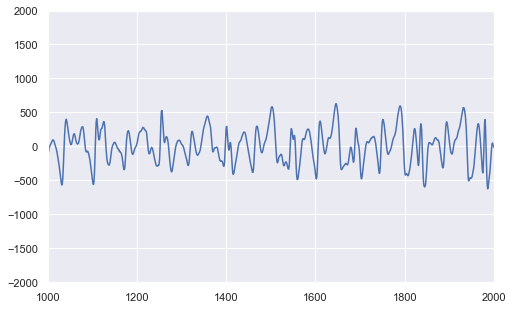

In [5]:
mystery_sound = np.loadtxt("mystery_sound.txt")
fig, ax = plt.subplots()
ax.plot(mystery_sound)
ax.set_xlim(1000, 2000)
ax.set_ylim(-2000, 2000)
plt.show()

The curve it makes is not just a sine wave. What does it sound like? 

### Exercise

Use the `Audio` command to play this sound. Then, after listening to it, write down the name of the tune that plays.

# Making sounds

Now that you see a sound can be expressed as a list of numbers, let's set about making our own music. We will need a way to make musical notes. To do that, we will use the **chromatic scale**. In the chromatic scale, twelve notes make up an octave and their frequencies are evenly spaced. These are the notes made by piano keys.

--------------------
Middle A has the frequency 440.00


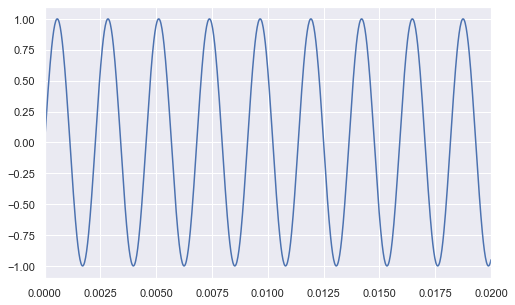

--------------------
Middle A# has the frequency 466.16


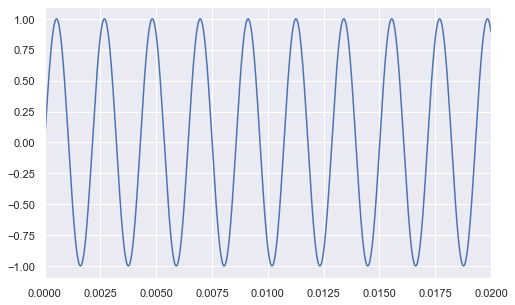

--------------------
Middle B has the frequency 493.88


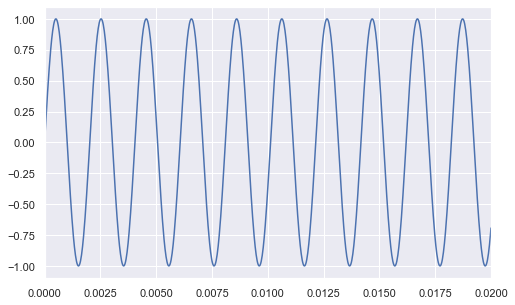

--------------------
Middle C has the frequency 523.25


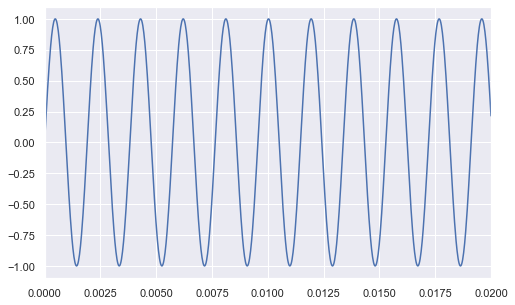

--------------------
Middle C# has the frequency 554.37


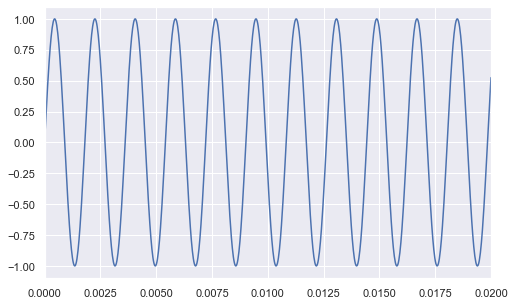

--------------------
Middle D has the frequency 587.33


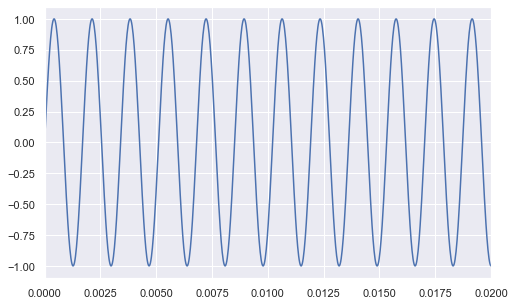

--------------------
Middle D# has the frequency 622.25


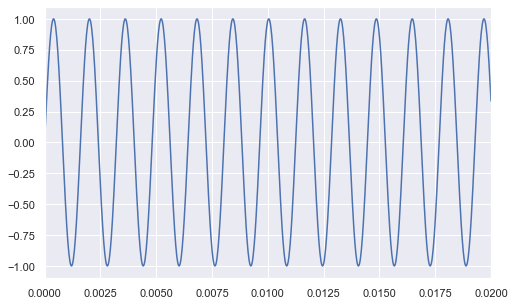

--------------------
Middle E has the frequency 659.26


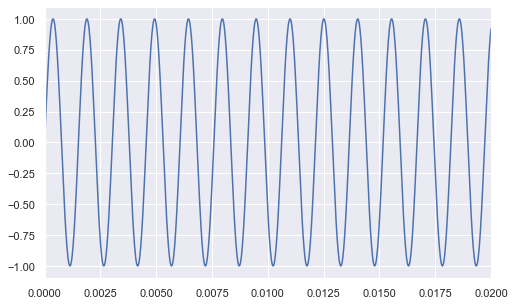

--------------------
Middle F has the frequency 698.46


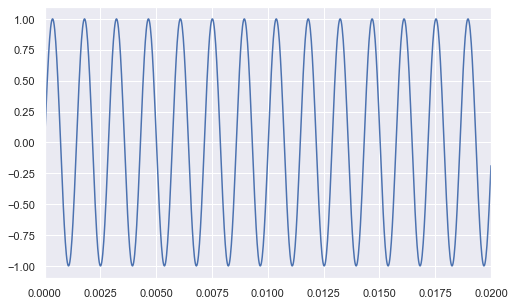

--------------------
Middle F# has the frequency 739.99


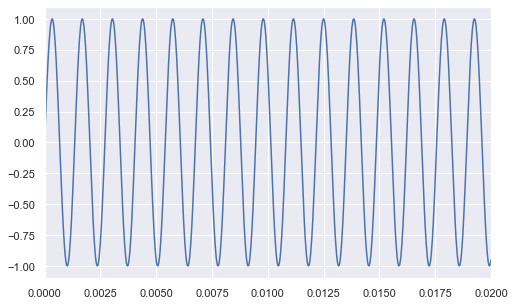

--------------------
Middle G has the frequency 783.99


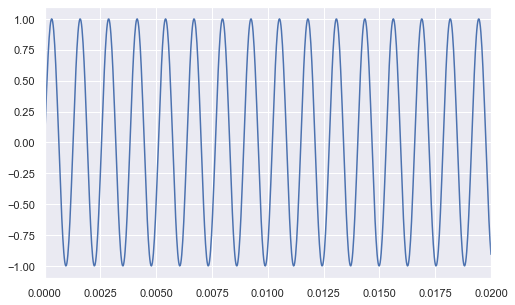

--------------------
Middle G# has the frequency 830.61


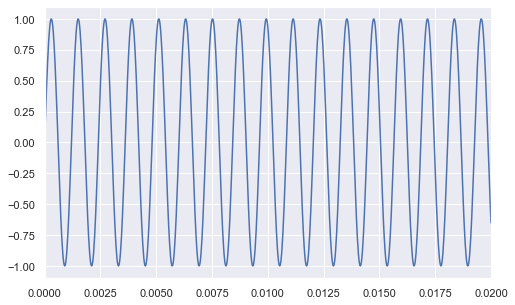

In [6]:
t = np.linspace(0, 0.5, 44100 // 2)
notes = "A A# B C C# D D# E F F# G G#"
frequencies = 440 * 2 ** (np.arange(12) / 12)
scale = dict(zip(notes.split(), frequencies))
for note, frequency in scale.items():
    print("-" * 20)
    print(f"Middle {note} has the frequency {frequency:.2f}")
    fig, ax = plt.subplots()
    y = np.sin(2 * np.pi * frequency * t)
    ax.plot(t, y)
    ax.set_xlim(0, 0.02)
    plt.show()
    display(Audio(y, rate=44100))

# Making Music

By stringing these together, we can form a song. We will use the function `np.concatenate` which stacks up arrays end-to-end. Here is the start of "Row Row Your Boat".

In [7]:
boat_notes = "C C C D E E D E F G"
boat_song = np.concatenate(
    [np.sin(2 * np.pi * scale[note] * t) for note in boat_notes.split()]
)
print(boat_song[:10])
Audio(boat_song, rate=44100)

[0.         0.07448499 0.14855616 0.22180199 0.29381555 0.36419675
 0.43255457 0.49850923 0.56169432 0.62175878]


What if we only play every other number? Let's try it with slicing.

In [8]:
faster = boat_song[::2]
print(faster[:10])
Audio(faster, rate=44100)

[0.         0.14855616 0.29381555 0.43255457 0.56169432 0.67836891
 0.77998911 0.86429975 0.9294298  0.97393389]


Now let's try dragging the notes out longer by repeating each number twice.

In [9]:
slower = np.repeat(boat_song, 2)
print(slower[:10])
Audio(slower, rate=44100)

[0.         0.         0.07448499 0.07448499 0.14855616 0.14855616
 0.22180199 0.22180199 0.29381555 0.29381555]


When we play it back faster, the song has a higher pitch but lasts half as long. When we play it back slower the song has a lower pitch and lasts twice as long. Most people find that the song is still recognizably the same when the pitch is doubled or halved, so we give a note with twice or one-half the frequency the same letter. Here is a wider scale we can use:

In [10]:
full_scale = {}
for i in range(1, 7):
    for j, letter in enumerate(notes.split()):
        full_scale[letter + str(i)] = 440 * 2 ** (i - 4 + j / 12)
full_scale

{'A1': 55.0,
 'A#1': 58.27047018976124,
 'B1': 61.7354126570155,
 'C1': 65.40639132514966,
 'C#1': 69.29565774421802,
 'D1': 73.41619197935188,
 'D#1': 77.78174593052023,
 'E1': 82.4068892282175,
 'F1': 87.30705785825097,
 'F#1': 92.4986056779086,
 'G1': 97.99885899543733,
 'G#1': 103.82617439498628,
 'A2': 110.0,
 'A#2': 116.54094037952248,
 'B2': 123.47082531403103,
 'C2': 130.8127826502993,
 'C#2': 138.59131548843604,
 'D2': 146.8323839587038,
 'D#2': 155.56349186104046,
 'E2': 164.813778456435,
 'F2': 174.61411571650194,
 'F#2': 184.9972113558172,
 'G2': 195.99771799087466,
 'G#2': 207.65234878997256,
 'A3': 220.0,
 'A#3': 233.08188075904496,
 'B3': 246.94165062806206,
 'C3': 261.6255653005986,
 'C#3': 277.1826309768721,
 'D3': 293.6647679174076,
 'D#3': 311.1269837220809,
 'E3': 329.6275569128699,
 'F3': 349.2282314330039,
 'F#3': 369.9944227116344,
 'G3': 391.99543598174927,
 'G#3': 415.3046975799451,
 'A4': 440.0,
 'A#4': 466.1637615180899,
 'B4': 493.8833012561241,
 'C4': 523.2

### Exercise

Here are the notes for the chorus of Hail Purdue. Play the song!
```
D#3 D#3 F3 G3 G#3 A#4 C4 C4 C#4 C#4 G#3 A#4 C4 C4 C4
```


### Exercise

Musicians often speed up or slow down their music for an artistic effect. The file `chipmunk.txt` has an excerpt from The Chipmunk Song by Ross Bagdasarian. Make a slowed-down version so you can hear what he sounded like while recording the voices of the chipmunks.

``` https://madmusic.com/samples/a/l/Alvin_+_The_Chipmunks_-_Chipmunk_Song_(Christmas_Don't_Be_Late).mp3
```

In [11]:
chipmunk = np.loadtxt("chipmunk.txt")
Audio(chipmunk, rate=44100)